# Data Preparation

Understand dataset (application)

1. **ID**: An identifier for each individual, typically a unique number assigned to each record.

2. **CODE_GENDER**: Gender of the individual (e.g., "M" for male, "F" for female).

3. **FLAG_OWN_CAR**: Indicates whether the individual owns a car (1 for yes, 0 for no).

4. **FLAG_OWN_REALTY**: Indicates whether the individual owns real estate/property (1 for yes, 0 for no).

5. **CNT_CHILDREN**: The count of children the individual has.

6. **AMT_INCOME_TOTAL**: The total annual income of the individual.

7. **NAME_INCOME_TYPE**: The type of income the individual receives (e.g., salary, business, maternity leave).

8. **NAME_EDUCATION_TYPE**: The highest level of education attained by the individual.

9. **NAME_FAMILY_STATUS**: The family status of the individual (e.g., married, single).

10. **NAME_HOUSING_TYPE**: The type of housing the individual lives in (e.g., own apartment, for free).

11. **DAYS_BIRTH**: The age of the individual in days (negative values representing days in the past).

12. **DAYS_EMPLOYED**: The number of days the individual has been employed (negative values representing days in the past). This might be unusual because employment duration is typically positive, so you may need to investigate the dataset or consider the sign convention used.

13. **FLAG_MOBIL**: Indicates whether the individual has a mobile phone (1 for yes, 0 for no).

14. **FLAG_WORK_PHONE**: Indicates whether the individual has a work phone (1 for yes, 0 for no).

15. **FLAG_PHONE**: Indicates whether the individual has a phone (1 for yes, 0 for no).

16. **FLAG_EMAIL**: Indicates whether the individual has an email (1 for yes, 0 for no).

17. **OCCUPATION_TYPE**: The type of occupation the individual is engaged in.

18. **CNT_FAM_MEMBERS**: The count of family members.

Understand dataset (credit)

1. **ID**: An identifier for each individual, likely a unique number assigned to each record.

2. **MONTHS_BALANCE**: The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

3. **STATUS**: 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [11]:
# import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

app_rec = pd.read_csv('application_record.csv')
cred_rec = pd.read_csv('credit_record.csv')

In [42]:
# merge data
df = pd.merge(app_rec, cred_rec, on = 'ID', how = 'left')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4.0,C


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179815 entries, 0 to 1179814
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1179815 non-null  int64  
 1   CODE_GENDER          1179815 non-null  object 
 2   FLAG_OWN_CAR         1179815 non-null  object 
 3   FLAG_OWN_REALTY      1179815 non-null  object 
 4   CNT_CHILDREN         1179815 non-null  int64  
 5   AMT_INCOME_TOTAL     1179815 non-null  float64
 6   NAME_INCOME_TYPE     1179815 non-null  object 
 7   NAME_EDUCATION_TYPE  1179815 non-null  object 
 8   NAME_FAMILY_STATUS   1179815 non-null  object 
 9   NAME_HOUSING_TYPE    1179815 non-null  object 
 10  DAYS_BIRTH           1179815 non-null  int64  
 11  DAYS_EMPLOYED        1179815 non-null  int64  
 12  FLAG_MOBIL           1179815 non-null  int64  
 13  FLAG_WORK_PHONE      1179815 non-null  int64  
 14  FLAG_PHONE           1179815 non-null  int64  
 15

In [14]:
# check for missing values
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        362928
CNT_FAM_MEMBERS             0
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64

In [43]:
# drop column
df = df.drop('OCCUPATION_TYPE', axis = 1)

In [44]:
# cleanse the outliers
df = df[df['CNT_CHILDREN'] <= 6]
df = df[df['DAYS_EMPLOYED'] < 0]

In [17]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,9.824700e+05,982470.000000,9.824700e+05,982470.000000,982470.000000,982470.0,982470.000000,982470.000000,982470.000000,982470.000000,649580.000000
mean,5.428049e+06,0.503263,1.959761e+05,-14941.887264,-2727.801221,1.0,0.267092,0.297609,0.108491,2.295404,-19.342809
std,5.734720e+05,0.761599,1.079380e+05,3464.711285,2415.038722,0.0,0.442441,0.457207,0.310999,0.920016,14.055550
min,5.008804e+06,0.000000,2.700000e+04,-24834.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.061377e+06,0.000000,1.350000e+05,-17576.000000,-3627.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.115970e+06,0.000000,1.800000e+05,-14726.000000,-2086.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.762446e+06,1.000000,2.250000e+05,-12104.000000,-992.000000,1.0,1.000000,1.000000,0.000000,3.000000,-8.000000
max,7.999952e+06,6.000000,6.750000e+06,-7489.000000,-12.000000,1.0,1.000000,1.000000,1.000000,8.000000,0.000000


In [18]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4.0,C


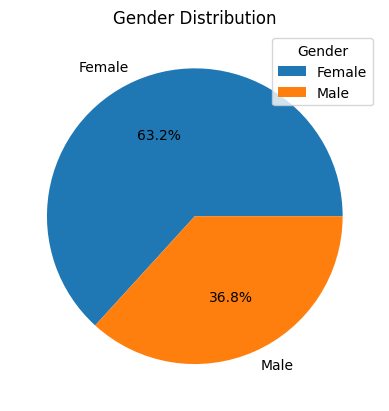

In [19]:
gender = df.groupby('CODE_GENDER')['ID'].count()

plt.pie(gender, labels=['Female', 'Male'], autopct='%.1f%%')
plt.legend(title="Gender", loc="upper right")
plt.title("Gender Distribution")
plt.show()

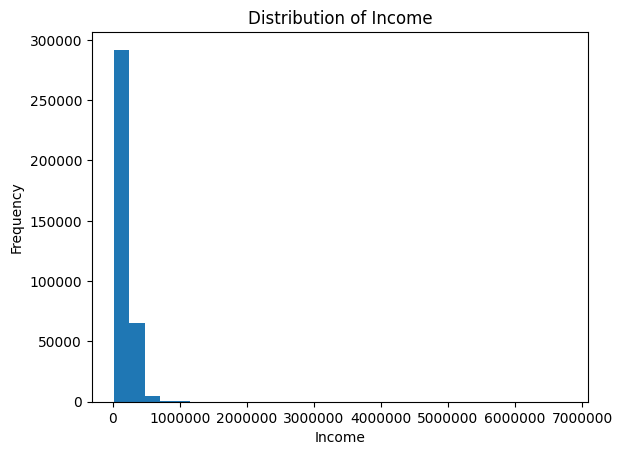

In [21]:
income_mean = df.groupby('ID')['AMT_INCOME_TOTAL'].mean()

income_mean.plot(kind='hist', bins = 30)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# Score the customers

In [22]:
# payments past due by more than 30 days will be considered as a poor payment history
df['STATUS'] = df['STATUS'].map(
    {'X': 1,
     'C': 1,
     '0': 0.5,
     '1': 0,
     '2': 0,
     '3': 0,
     '4': 0,
     '5': 0}
)

In [23]:
# calculate the average score for each custome
score = df.groupby('ID')['STATUS'].mean()

In [24]:
# drop MONTH_BALANCE and STATUS after calculating score
df = df.drop(['MONTHS_BALANCE', 'STATUS'], axis=1)

In [26]:
# drop duplicatex and reset the index
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

In [27]:
df = pd.merge(df, score, on = 'ID', how = 'left')
df.rename(columns={'STATUS': 'SCORE'}, inplace=True)

In [28]:
# customers with a score greater than 0.7 are considered good
df['APPROVAL_STATUS'] = np.where(df['SCORE'] > 0.7, 'approved', 'disapproved')

# assuming a null score represents a new customer
df['APPROVAL_STATUS'] = np.where(df['SCORE'].isna(), 'approved', df['APPROVAL_STATUS'])

In [29]:
df['APPROVAL_STATUS'].value_counts()

approved       350765
disapproved     12441
Name: APPROVAL_STATUS, dtype: int64

In [30]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,SCORE,APPROVAL_STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0.906250,approved
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0.900000,approved
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0.883333,approved
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,0.800000,approved
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1.000000,approved


# Data preparation for predictive model training

In [31]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# for loop to encode the column that contain data type 'object'
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [32]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,SCORE,APPROVAL_STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,0.906250,0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,0.900000,0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0,0.883333,0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0,0.800000,0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0,1.000000,0


# Classification Predictive Model

In [33]:
pip install imbalanced-learn

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

X = df.drop(['ID', 'SCORE', 'APPROVAL_STATUS', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'DAYS_EMPLOYED', 'NAME_FAMILY_STATUS'], axis = 1)
y = df.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

# Normalization to scales the features to a similar range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Oversampling to balance the class distribution
ros = RandomOverSampler()
X_train_scaled_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

In [35]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled_ros, y_train_ros)

# predict
y_pred_logreg = logreg.predict(X_test_scaled)

# evaluate
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_logreg = confusion_matrix(y_test, y_pred_logreg)
print('Logistic Regression Accuracy:', accuracy_logreg)
conf_logreg

Logistic Regression Accuracy: 0.5722361924340595


array([[60769, 44542],
       [ 2068,  1583]])

In [36]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled_ros, y_train_ros)

# predict
y_pred_dt = dt.predict(X_test_scaled)

# evaluate
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_dt = confusion_matrix(y_test, y_pred_dt)
print('Decision Tree Accuracy:', accuracy_dt)
conf_dt

Decision Tree Accuracy: 0.9302325581395349


array([[99781,  5530],
       [ 2072,  1579]])

In [37]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled_ros, y_train_ros)

# predict
y_pred_rf = rf.predict(X_test_scaled)

# evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_rf = confusion_matrix(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)
conf_rf

Random Forest Accuracy: 0.9455131146638277


array([[100584,   4727],
       [  1210,   2441]])